# Operations carried out on Telco-Customer-Churn

1. Compare churn count with respect to gender.
2. Findout how many female senior citizen there in the dataset
3. Compare 'tenure' with 'Total Charges'
4. Findout which contract preffered by the senior citizen.
5. Comment your finds on Payment Method?

#### 1) Compare churn count with respect to gender.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

data_set = pd.read_excel('Telco-Customer-Churn.xlsx')

In [2]:
#Count of no.of Males & Females without Churn
df_mno = data_set[(data_set["Churn"] == "No") & (data_set["gender"] == "Male")].count()
print("Males without Churn: ", df_mno["Churn"])
df_fno = data_set[(data_set["Churn"] == "No") & (data_set["gender"] == "Female")].count()
print("Females without Churn: ", df_fno["Churn"])
#Count of no.of Males & Females with Churn
df_myes = data_set[(data_set["Churn"] == "Yes") & (data_set["gender"] == "Male")].count()
print("Males with Churn: ", df_myes["Churn"])
df_fyes = data_set[(data_set["Churn"] == "Yes") & (data_set["gender"] == "Female")].count()
print("Females with Churn: ", df_fyes["Churn"])

Males without Churn:  2625
Females without Churn:  2549
Males with Churn:  930
Females with Churn:  939


<AxesSubplot:xlabel='gender', ylabel='count'>

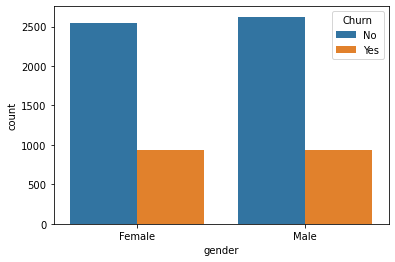

In [3]:
sns.countplot(x='gender',hue='Churn', data=data_set)

#### 2) Findout how many female senior citizen there in the dataset

In [4]:
data_female = data_set.groupby('gender')['SeniorCitizen'].count()
data_female
a=data_set.groupby(['SeniorCitizen','gender']).size()
b=a.unstack()
print('Total Female senior citizens :',b['Female'].iloc[1])

Total Female senior citizens : 568


#### 3) Compare 'tenure' with 'Total Charges'

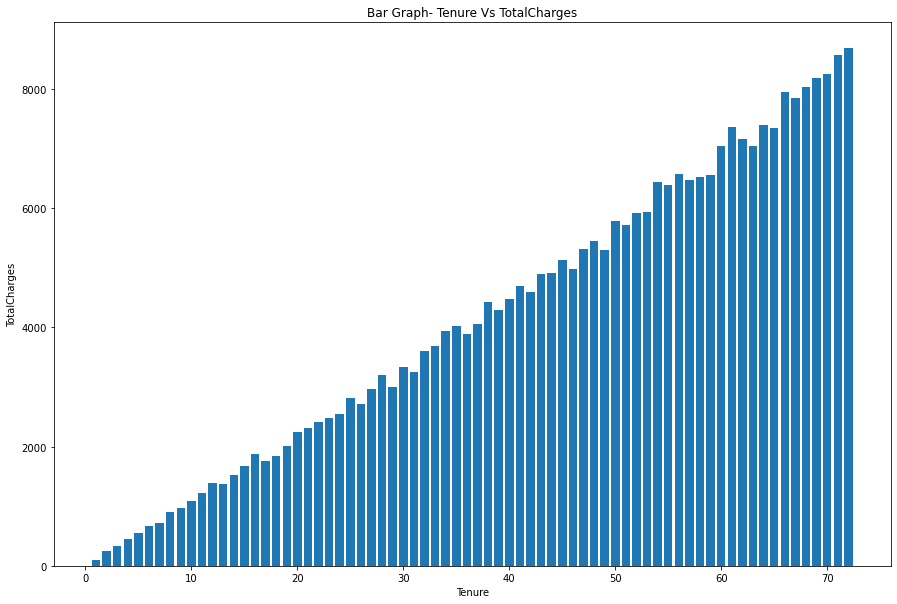

In [5]:
data_set["tenure"] = pd.to_numeric(data_set["tenure"], errors = 'coerce')
data_set["TotalCharges"] = pd.to_numeric(data_set["TotalCharges"], errors = 'coerce')
x=data_set["tenure"] 
y=data_set["TotalCharges"]
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.title("Bar Graph- Tenure Vs TotalCharges")
plt.xlabel("Tenure")
plt.ylabel("TotalCharges")
plt.show()

### Inference:-
As Tenure increases there is a linear increase in TotalCharges

#### 4) Findout which contract preffered by the senior citizen.

In [6]:
### Senior Citizens preferring Two year Contract
data_count=data_set[(data_set["SeniorCitizen"] == 1) & (data_set["Contract"] == "Two year")]
print('SeniorCitizens having 2 year contract :' ,data_count["SeniorCitizen"].count())
data_count=data_set[(data_set["SeniorCitizen"] == 1) & (data_set["Contract"] == "One year")]
print('SeniorCitizens having 1 year contract :' ,data_count["SeniorCitizen"].count())
data_count=data_set[(data_set["SeniorCitizen"] == 1) & (data_set["Contract"] == "Month-to-month")]
print('SeniorCitizens having Month-to-month contract :' ,data_count["SeniorCitizen"].count())

SeniorCitizens having 2 year contract : 145
SeniorCitizens having 1 year contract : 190
SeniorCitizens having Month-to-month contract : 807


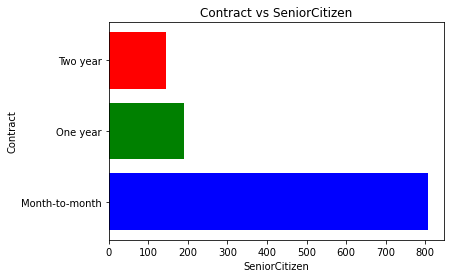

In [7]:
data_new=data_set.groupby('Contract')['SeniorCitizen'].sum().to_frame().reset_index()
 
plt.barh(data_new['Contract'],data_new['SeniorCitizen'],color = ['Blue','Green','Red']) 

plt.title('Contract vs SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Contract') 

plt.show()

Inference :-

Month-to-Month is the most preferred contract by senior citizens

#### 5) Comment your finds on Payment Method?

In [8]:
payment_data =data_set.groupby(['PaymentMethod','SeniorCitizen','gender']).size()
payment_data

PaymentMethod              SeniorCitizen  gender
Bank transfer (automatic)  0              Female    676
                                          Male      635
                           1              Female    112
                                          Male      121
Credit card (automatic)    0              Female    642
                                          Male      659
                           1              Female    110
                                          Male      111
Electronic check           0              Female    874
                                          Male      897
                           1              Female    296
                                          Male      298
Mailed check               0              Female    728
                                          Male      790
                           1              Female     50
                                          Male       44
dtype: int64

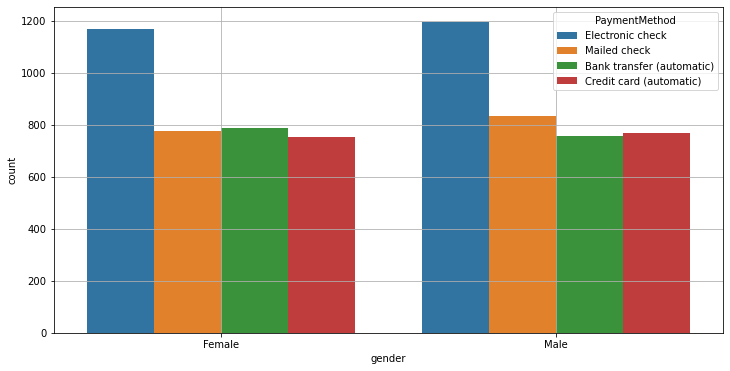

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(data=data_set,x='gender',hue='PaymentMethod') 
plt.grid()


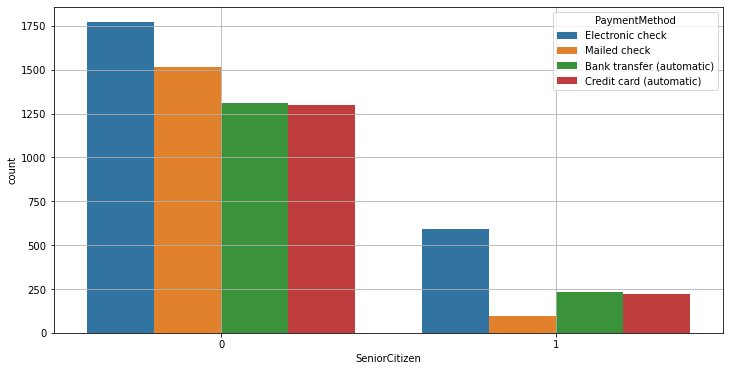

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(data=data_set,x='SeniorCitizen',hue='PaymentMethod') 
plt.grid()

#### Insights
1. The most commonly used payment method is Electronic Check
2. The least used payment method is Credit Card
3. Senior citizens mostly prefer Electronic Check
4. Senior citizens least preferred payment mode is Mailed Check
5. The payment method of 'Mailed Check' is prominent among non-SeniorCitizens, but it is very less preferred by SeniorCitizens